In [1]:
from PIL import Image
from vangogh.evolution import Evolution
from vangogh.fitness import draw_voronoi_image
from vangogh.experiment_module.experiment import Experiment
from vangogh.util import IMAGE_SHRINK_SCALE, REFERENCE_IMAGE
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
import cma
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('classic')
%matplotlib inline

from multiprocess import Pool, cpu_count

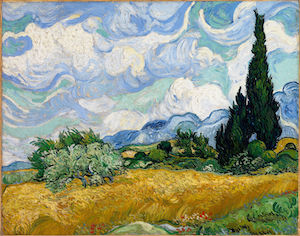

In [2]:
display(REFERENCE_IMAGE)

In [3]:
# Enable to show live rendering of best individual during optimization
display_output = False
# Enable to save progress images at every 50th generation
save_progress = True
# Enable to print verbose output per generation
verbose_output = True

In [4]:
def reporter(time, evo):
    if save_progress or display_output:
        elite = draw_voronoi_image(evo.elite, evo.reference_image.width, evo.reference_image.height, scale=IMAGE_SHRINK_SCALE)
    if display_output:
        clear_output()
        display(elite)
    if save_progress and time["num-generations"] % 50 == 0:
        elite.save(f"./img/van_gogh_intermediate_{evo.seed}_{evo.population_size}_{evo.crossover_method}_{evo.num_points}_{evo.initialization}_{evo.generation_budget}_{time['num-generations']:05d}.png")


## Classic Example

In [5]:
evo = Evolution(100,
                    REFERENCE_IMAGE,
                    population_size=240,
                    generation_reporter=reporter,
                    crossover_method="ONE_POINT",
                    seed=10,
                    initialization="RANDOM",
                    generation_budget=500,
                    num_features_mutation_strength=.25,
                    selection_name='tournament_4',
                    verbose=verbose_output)

In [6]:
experiment_classic = Experiment("Classic", evo)

generation: 1 best fitness: 136140 avg. fitness: 145091.75416666668
generation: 2 best fitness: 128146 avg. fitness: 139704.54166666666
generation: 3 best fitness: 122781 avg. fitness: 135586.9375
generation: 4 best fitness: 122781 avg. fitness: 131511.94583333333
generation: 5 best fitness: 121529 avg. fitness: 128444.025
generation: 6 best fitness: 119457 avg. fitness: 125863.14583333333
generation: 7 best fitness: 117467 avg. fitness: 123289.425
generation: 8 best fitness: 117311 avg. fitness: 121088.24583333333
generation: 9 best fitness: 115813 avg. fitness: 119376.40416666666
generation: 10 best fitness: 112125 avg. fitness: 118117.65
generation: 11 best fitness: 111804 avg. fitness: 116884.53333333334
generation: 12 best fitness: 111551 avg. fitness: 115668.05416666667
generation: 13 best fitness: 108598 avg. fitness: 114171.325
generation: 14 best fitness: 108580 avg. fitness: 112140.375
generation: 15 best fitness: 107370 avg. fitness: 110868.475
generation: 16 best fitness: 1

generation: 128 best fitness: 77264 avg. fitness: 77731.10833333334
generation: 129 best fitness: 77098 avg. fitness: 77565.87916666667
generation: 130 best fitness: 76707 avg. fitness: 77380.80416666667
generation: 131 best fitness: 76629 avg. fitness: 77200.75833333333
generation: 132 best fitness: 76575 avg. fitness: 76996.45
generation: 133 best fitness: 76395 avg. fitness: 76784.32916666666
generation: 134 best fitness: 75994 avg. fitness: 76598.70833333333
generation: 135 best fitness: 75906 avg. fitness: 76436.05
generation: 136 best fitness: 75786 avg. fitness: 76260.85833333334
generation: 137 best fitness: 75464 avg. fitness: 76036.98333333334
generation: 138 best fitness: 75215 avg. fitness: 75802.49583333333
generation: 139 best fitness: 75147 avg. fitness: 75607.5125
generation: 140 best fitness: 75054 avg. fitness: 75449.525
generation: 141 best fitness: 74707 avg. fitness: 75282.6125
generation: 142 best fitness: 74704 avg. fitness: 75107.95833333333
generation: 143 best

generation: 254 best fitness: 59487 avg. fitness: 59686.3
generation: 255 best fitness: 59433 avg. fitness: 59615.69583333333
generation: 256 best fitness: 59290 avg. fitness: 59552.24166666667
generation: 257 best fitness: 59290 avg. fitness: 59482.45416666667
generation: 258 best fitness: 59202 avg. fitness: 59415.416666666664
generation: 259 best fitness: 59148 avg. fitness: 59336.495833333334
generation: 260 best fitness: 59126 avg. fitness: 59269.82083333333
generation: 261 best fitness: 58996 avg. fitness: 59203.45
generation: 262 best fitness: 58836 avg. fitness: 59134.6625
generation: 263 best fitness: 58836 avg. fitness: 59065.541666666664
generation: 264 best fitness: 58713 avg. fitness: 58980.67916666667
generation: 265 best fitness: 58709 avg. fitness: 58900.2125
generation: 266 best fitness: 58639 avg. fitness: 58821.90833333333
generation: 267 best fitness: 58484 avg. fitness: 58730.1375
generation: 268 best fitness: 58202 avg. fitness: 58651.8625
generation: 269 best fit

generation: 380 best fitness: 49383 avg. fitness: 49638.65833333333
generation: 381 best fitness: 49383 avg. fitness: 49591.9625
generation: 382 best fitness: 49383 avg. fitness: 49539.3125
generation: 383 best fitness: 49326 avg. fitness: 49480.125
generation: 384 best fitness: 49239 avg. fitness: 49422.13333333333
generation: 385 best fitness: 49239 avg. fitness: 49362.05
generation: 386 best fitness: 49140 avg. fitness: 49311.229166666664
generation: 387 best fitness: 49135 avg. fitness: 49260.92916666667
generation: 388 best fitness: 49027 avg. fitness: 49210.07916666667
generation: 389 best fitness: 49017 avg. fitness: 49159.82083333333
generation: 390 best fitness: 48886 avg. fitness: 49099.47083333333
generation: 391 best fitness: 48886 avg. fitness: 49041.4625
generation: 392 best fitness: 48833 avg. fitness: 48985.85
generation: 393 best fitness: 48768 avg. fitness: 48933.17083333333
generation: 394 best fitness: 48715 avg. fitness: 48881.75
generation: 395 best fitness: 48568

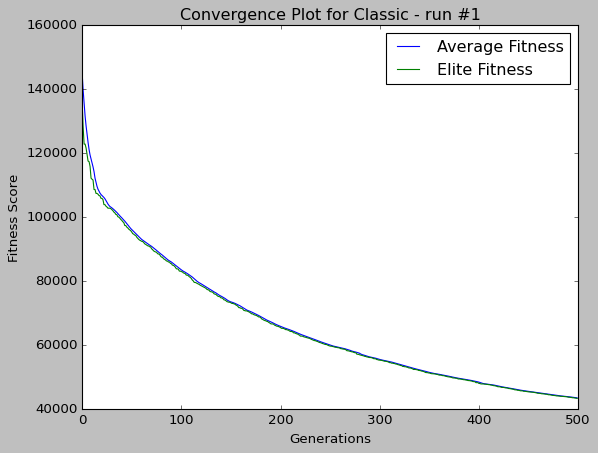

Average fitness 43478.36666666667
Elite fitness 43307
Total Runtime 241.97 sec



In [7]:
experiment_classic.run_experiment(repeats=1, plot_converge=True, mode="generation")

## Hyperparameter study for selection methods

In [ ]:
params = {
    'population_size': [240],
    'selection_name': ['fiscis', 'tournament_4']
}

experiment_classic.run_hyperparameter_eval(params, plot_converge=True, mode="generation")


generation: 1 best fitness: 132693 avg. fitness: 149395.1931330472
generation: 2 best fitness: 132693 avg. fitness: 147101.05263157896
generation: 3 best fitness: 132377 avg. fitness: 145879.38596491228
generation: 4 best fitness: 132377 avg. fitness: 144408.4880239521
generation: 5 best fitness: 129585 avg. fitness: 143123.54469273743
generation: 6 best fitness: 127440 avg. fitness: 141889.54237288135
generation: 7 best fitness: 127440 avg. fitness: 140205.61963190185
generation: 8 best fitness: 127440 avg. fitness: 138970.51445086705
generation: 9 best fitness: 127330 avg. fitness: 137685.45974025974
generation: 10 best fitness: 125703 avg. fitness: 136616.10328638498
generation: 11 best fitness: 121149 avg. fitness: 136148.7128514056
generation: 12 best fitness: 121149 avg. fitness: 135042.67137809188
generation: 13 best fitness: 117951 avg. fitness: 133828.30857142858
generation: 14 best fitness: 117951 avg. fitness: 132962.3879472693
generation: 15 best fitness: 117612 avg. fitnes

## UMDA

In [5]:
evo = Evolution(100,
                REFERENCE_IMAGE,
                evolution_type="UMDA",
                population_size=240,
                generation_reporter=reporter,
                crossover_method="ONE_POINT",
                seed=10,
                initialization="RANDOM",
                generation_budget=500,
                num_features_mutation_strength=.25,
                selection_name='tournament_4',
                verbose=verbose_output)


In [7]:
experiment_umda = Experiment("UMDA", evo)

generation: 1 best fitness: 136337 avg. fitness: 145175.59583333333
generation: 2 best fitness: 132745 avg. fitness: 140810.5375
generation: 3 best fitness: 131562 avg. fitness: 138162.77916666667
generation: 4 best fitness: 130610 avg. fitness: 135930.35833333334
generation: 5 best fitness: 123441 avg. fitness: 133808.90833333333
generation: 6 best fitness: 123441 avg. fitness: 132191.01666666666
generation: 7 best fitness: 122935 avg. fitness: 130250.73333333334
generation: 8 best fitness: 122935 avg. fitness: 129115.64166666666
generation: 9 best fitness: 122935 avg. fitness: 127857.5125
generation: 10 best fitness: 119862 avg. fitness: 126446.08333333333
generation: 11 best fitness: 119862 avg. fitness: 125305.9125
generation: 12 best fitness: 117440 avg. fitness: 124308.04166666667
generation: 13 best fitness: 117326 avg. fitness: 123205.5125
generation: 14 best fitness: 117326 avg. fitness: 122746.76666666666
generation: 15 best fitness: 117326 avg. fitness: 121582.24166666667
ge

generation: 127 best fitness: 54753 avg. fitness: 55994.291666666664
generation: 128 best fitness: 54753 avg. fitness: 55819.004166666666
generation: 129 best fitness: 54753 avg. fitness: 55638.245833333334
generation: 130 best fitness: 54753 avg. fitness: 55505.39166666667
generation: 131 best fitness: 54623 avg. fitness: 55396.541666666664
generation: 132 best fitness: 54623 avg. fitness: 55210.0125
generation: 133 best fitness: 54500 avg. fitness: 55106.63333333333
generation: 134 best fitness: 54500 avg. fitness: 55001.6875
generation: 135 best fitness: 53743 avg. fitness: 54880.82916666667
generation: 136 best fitness: 53743 avg. fitness: 54762.3875
generation: 137 best fitness: 53743 avg. fitness: 54698.7875
generation: 138 best fitness: 53743 avg. fitness: 54640.566666666666
generation: 139 best fitness: 53743 avg. fitness: 54496.166666666664
generation: 140 best fitness: 53493 avg. fitness: 54405.1125
generation: 141 best fitness: 53493 avg. fitness: 54279.4875
generation: 142 

generation: 252 best fitness: 48967 avg. fitness: 49326.520833333336
generation: 253 best fitness: 48967 avg. fitness: 49236.00833333333
generation: 254 best fitness: 48967 avg. fitness: 49168.875
generation: 255 best fitness: 48919 avg. fitness: 49195.25833333333
generation: 256 best fitness: 48831 avg. fitness: 49211.745833333334
generation: 257 best fitness: 48831 avg. fitness: 49122.183333333334
generation: 258 best fitness: 48831 avg. fitness: 49139.541666666664
generation: 259 best fitness: 48831 avg. fitness: 49154.6125
generation: 260 best fitness: 48831 avg. fitness: 49026.270833333336
generation: 261 best fitness: 48831 avg. fitness: 49045.975
generation: 262 best fitness: 48831 avg. fitness: 49041.59166666667
generation: 263 best fitness: 48827 avg. fitness: 49028.6375
generation: 264 best fitness: 48676 avg. fitness: 48969.754166666666
generation: 265 best fitness: 48676 avg. fitness: 48954.55
generation: 266 best fitness: 48676 avg. fitness: 48974.958333333336
generation: 

generation: 377 best fitness: 46336 avg. fitness: 46547.15833333333
generation: 378 best fitness: 46260 avg. fitness: 46505.520833333336
generation: 379 best fitness: 46260 avg. fitness: 46490.775
generation: 380 best fitness: 46260 avg. fitness: 46491.7
generation: 381 best fitness: 46260 avg. fitness: 46543.879166666666
generation: 382 best fitness: 46260 avg. fitness: 46503.058333333334
generation: 383 best fitness: 46260 avg. fitness: 46494.84583333333
generation: 384 best fitness: 46260 avg. fitness: 46461.120833333334
generation: 385 best fitness: 46260 avg. fitness: 46360.058333333334
generation: 386 best fitness: 46260 avg. fitness: 46385.92916666667
generation: 387 best fitness: 46217 avg. fitness: 46347.89166666667
generation: 388 best fitness: 46217 avg. fitness: 46412.40833333333
generation: 389 best fitness: 46217 avg. fitness: 46413.3875
generation: 390 best fitness: 46203 avg. fitness: 46409.92916666667
generation: 391 best fitness: 46203 avg. fitness: 46372.46666666667


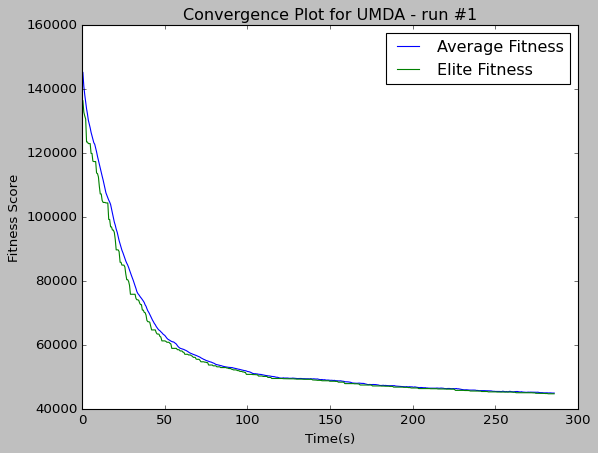

Average fitness 44993.92916666667
Elite fitness 44758
Total Runtime 286.16 sec



In [7]:
experiment_umda.run_experiment(repeats=1, plot_converge=True, mode="time")

generation: 1 best fitness: 132866 avg. fitness: 144605.45833333334
generation: 2 best fitness: 132405 avg. fitness: 140965.34583333333
generation: 3 best fitness: 129633 avg. fitness: 138180.94166666668
generation: 4 best fitness: 129633 avg. fitness: 135712.38333333333
generation: 5 best fitness: 127293 avg. fitness: 134099.64166666666
generation: 6 best fitness: 124879 avg. fitness: 132432.67916666667
generation: 7 best fitness: 124054 avg. fitness: 130717.67916666667
generation: 8 best fitness: 124054 avg. fitness: 129478.9
generation: 9 best fitness: 124054 avg. fitness: 128320.85833333334
generation: 10 best fitness: 118708 avg. fitness: 126732.12083333333
generation: 11 best fitness: 117488 avg. fitness: 125302.29583333334
generation: 12 best fitness: 117488 avg. fitness: 124381.75
generation: 13 best fitness: 117344 avg. fitness: 123040.69583333333
generation: 14 best fitness: 115320 avg. fitness: 121817.36666666667
generation: 15 best fitness: 115320 avg. fitness: 120509.425
g

generation: 128 best fitness: 56474 avg. fitness: 57128.1125
generation: 129 best fitness: 56474 avg. fitness: 56960.32916666667
generation: 130 best fitness: 55992 avg. fitness: 56939.17916666667
generation: 131 best fitness: 55992 avg. fitness: 56902.208333333336
generation: 132 best fitness: 55992 avg. fitness: 56836.433333333334
generation: 133 best fitness: 55992 avg. fitness: 56760.45416666667
generation: 134 best fitness: 55945 avg. fitness: 56676.42916666667
generation: 135 best fitness: 55945 avg. fitness: 56530.40833333333
generation: 136 best fitness: 55857 avg. fitness: 56346.675
generation: 137 best fitness: 55744 avg. fitness: 56263.1875
generation: 138 best fitness: 55709 avg. fitness: 56129.98333333333
generation: 139 best fitness: 54929 avg. fitness: 56122.3625
generation: 140 best fitness: 54929 avg. fitness: 56011.57916666667
generation: 141 best fitness: 54929 avg. fitness: 55907.65833333333
generation: 142 best fitness: 54814 avg. fitness: 55796.291666666664
genera

generation: 252 best fitness: 50319 avg. fitness: 50686.46666666667
generation: 253 best fitness: 50319 avg. fitness: 50681.96666666667
generation: 254 best fitness: 50067 avg. fitness: 50582.03333333333
generation: 255 best fitness: 50067 avg. fitness: 50551.370833333334
generation: 256 best fitness: 50067 avg. fitness: 50564.99166666667
generation: 257 best fitness: 50067 avg. fitness: 50443.625
generation: 258 best fitness: 50067 avg. fitness: 50447.84166666667
generation: 259 best fitness: 50067 avg. fitness: 50428.97083333333
generation: 260 best fitness: 50067 avg. fitness: 50369.07916666667
generation: 261 best fitness: 50067 avg. fitness: 50290.0375
generation: 262 best fitness: 49762 avg. fitness: 50310.129166666666
generation: 263 best fitness: 49762 avg. fitness: 50206.941666666666
generation: 264 best fitness: 49762 avg. fitness: 50171.558333333334
generation: 265 best fitness: 49762 avg. fitness: 50180.191666666666
generation: 266 best fitness: 49762 avg. fitness: 50094.27

generation: 378 best fitness: 47124 avg. fitness: 47257.98333333333
generation: 379 best fitness: 47124 avg. fitness: 47286.7875
generation: 380 best fitness: 47124 avg. fitness: 47300.058333333334
generation: 381 best fitness: 47000 avg. fitness: 47276.63333333333
generation: 382 best fitness: 47000 avg. fitness: 47330.55416666667
generation: 383 best fitness: 46973 avg. fitness: 47263.275
generation: 384 best fitness: 46973 avg. fitness: 47242.183333333334
generation: 385 best fitness: 46973 avg. fitness: 47241.75833333333
generation: 386 best fitness: 46973 avg. fitness: 47194.01666666667
generation: 387 best fitness: 46973 avg. fitness: 47183.29583333333
generation: 388 best fitness: 46973 avg. fitness: 47177.075
generation: 389 best fitness: 46808 avg. fitness: 47129.35833333333
generation: 390 best fitness: 46808 avg. fitness: 47113.225
generation: 391 best fitness: 46808 avg. fitness: 47150.25833333333
generation: 392 best fitness: 46808 avg. fitness: 47117.9375
generation: 393 

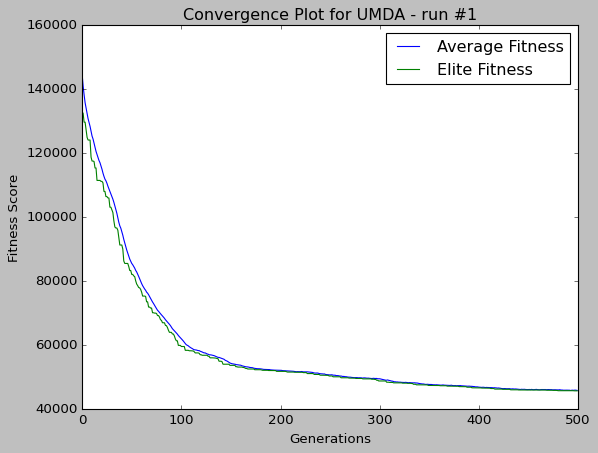

Average fitness 45815.754166666666
Elite fitness 45672
Total Runtime 285.5 sec



In [8]:
experiment_umda.run_experiment(repeats=1, plot_converge=True, mode="generation")

## PBIL

In [17]:
evo = Evolution(100,
                REFERENCE_IMAGE,
                evolution_type="PBIL",
                population_size=240,
                generation_reporter=reporter,
                crossover_method="ONE_POINT",
                seed=10,
                initialization="RANDOM",
                generation_budget=500,
                num_features_mutation_strength=.25,
                selection_name='tournament_8',
                verbose=verbose_output,
                learning_rate=0.9)


In [18]:
experiment_pbil = Experiment("PBIL", evo)

generation: 1 best fitness: 128414 avg. fitness: 151722.99583333332
generation: 2 best fitness: 128209 avg. fitness: 148962.24166666667
generation: 3 best fitness: 125709 avg. fitness: 146320.74583333332
generation: 4 best fitness: 125709 avg. fitness: 143433.74166666667
generation: 5 best fitness: 125449 avg. fitness: 142146.15
generation: 6 best fitness: 125449 avg. fitness: 140679.77083333334
generation: 7 best fitness: 124864 avg. fitness: 139288.60833333334
generation: 8 best fitness: 124310 avg. fitness: 138651.8625
generation: 9 best fitness: 117838 avg. fitness: 136781.5625
generation: 10 best fitness: 116512 avg. fitness: 136336.7875
generation: 11 best fitness: 116512 avg. fitness: 134766.97916666666
generation: 12 best fitness: 115503 avg. fitness: 134640.08333333334
generation: 13 best fitness: 115503 avg. fitness: 135051.02083333334
generation: 14 best fitness: 115503 avg. fitness: 133278.2625
generation: 15 best fitness: 115503 avg. fitness: 133131.26666666666
generation:

generation: 126 best fitness: 96466 avg. fitness: 120850.425
generation: 127 best fitness: 96466 avg. fitness: 119830.89166666666
generation: 128 best fitness: 96466 avg. fitness: 121001.2375
generation: 129 best fitness: 96466 avg. fitness: 120064.01666666666
generation: 130 best fitness: 96466 avg. fitness: 121626.48333333334
generation: 131 best fitness: 96466 avg. fitness: 121418.93333333333
generation: 132 best fitness: 96466 avg. fitness: 121156.7875
generation: 133 best fitness: 96466 avg. fitness: 121574.09166666666
generation: 134 best fitness: 96466 avg. fitness: 121622.33333333333
generation: 135 best fitness: 96466 avg. fitness: 122024.07916666666
generation: 136 best fitness: 96466 avg. fitness: 120623.35
generation: 137 best fitness: 96466 avg. fitness: 120570.23333333334
generation: 138 best fitness: 96466 avg. fitness: 121307.45833333333
generation: 139 best fitness: 96466 avg. fitness: 120590.30416666667
generation: 140 best fitness: 96466 avg. fitness: 120718.54583333

generation: 250 best fitness: 96466 avg. fitness: 121656.10416666667
generation: 251 best fitness: 96466 avg. fitness: 121857.02916666666
generation: 252 best fitness: 96466 avg. fitness: 122315.62083333333
generation: 253 best fitness: 96466 avg. fitness: 121937.70416666666
generation: 254 best fitness: 96466 avg. fitness: 121016.81666666667
generation: 255 best fitness: 96466 avg. fitness: 121163.70833333333
generation: 256 best fitness: 96466 avg. fitness: 121539.97916666667
generation: 257 best fitness: 96466 avg. fitness: 120524.6
generation: 258 best fitness: 96466 avg. fitness: 121081.37916666667
generation: 259 best fitness: 96466 avg. fitness: 121985.19583333333
generation: 260 best fitness: 96466 avg. fitness: 120580.17083333334
generation: 261 best fitness: 96466 avg. fitness: 121216.16666666667
generation: 262 best fitness: 96466 avg. fitness: 121307.10833333334
generation: 263 best fitness: 96466 avg. fitness: 121965.7125
generation: 264 best fitness: 96466 avg. fitness: 1

generation: 374 best fitness: 96466 avg. fitness: 122121.96666666666
generation: 375 best fitness: 96466 avg. fitness: 122161.91666666667
generation: 376 best fitness: 96466 avg. fitness: 121581.62916666667
generation: 377 best fitness: 96466 avg. fitness: 122644.2625
generation: 378 best fitness: 96466 avg. fitness: 122360.27916666666
generation: 379 best fitness: 96466 avg. fitness: 121114.66666666667
generation: 380 best fitness: 96466 avg. fitness: 120982.39166666666
generation: 381 best fitness: 96466 avg. fitness: 120714.0875
generation: 382 best fitness: 96466 avg. fitness: 120938.89166666666
generation: 383 best fitness: 96466 avg. fitness: 120028.92083333334
generation: 384 best fitness: 96466 avg. fitness: 121514.18333333333
generation: 385 best fitness: 96466 avg. fitness: 121760.10833333334
generation: 386 best fitness: 96466 avg. fitness: 120373.5125
generation: 387 best fitness: 96466 avg. fitness: 120488.00416666667
generation: 388 best fitness: 96466 avg. fitness: 12027

generation: 497 best fitness: 96466 avg. fitness: 121118.8375
generation: 498 best fitness: 96466 avg. fitness: 119417.60833333334
generation: 499 best fitness: 96466 avg. fitness: 120213.125
generation: 500 best fitness: 96466 avg. fitness: 118976.73333333334


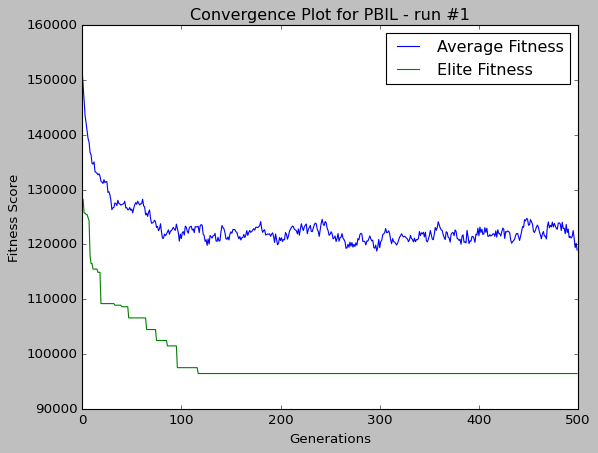

Average fitness 118976.73333333334
Elite fitness 96466
Total Runtime 349.85 sec



In [19]:
experiment_pbil.run_experiment(repeats=1, plot_converge=True, mode="generation")

## cGA ## Not done yet

In [ ]:
evo = Evolution(100,
                REFERENCE_IMAGE,
                evolution_type="cGA",
                population_size=100,
                generation_reporter=reporter,
                crossover_method="ONE_POINT",
                seed=10,
                initialization="RANDOM",
                generation_budget=500,
                verbose=verbose_output,
                learning_rate=0.5)


In [ ]:
experiment_cga = Experiment("cGA", evo)

In [ ]:
experiment_cga.run_experiment(repeats=1, plot_converge=True, mode="generation")